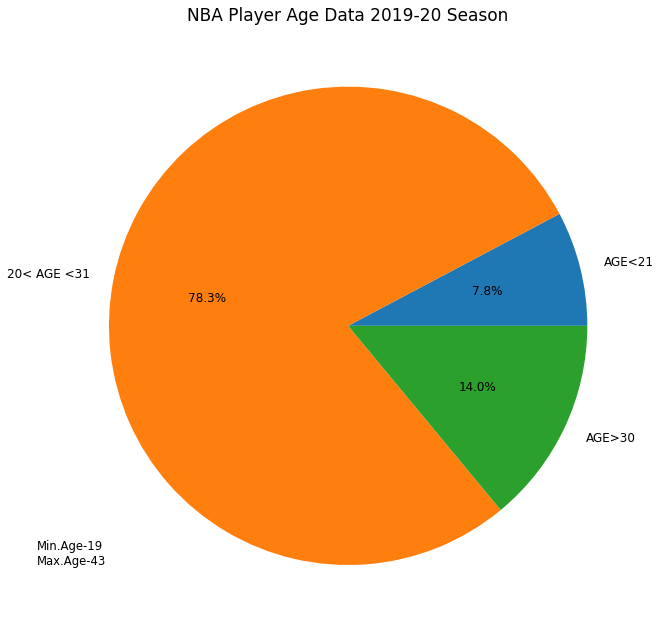

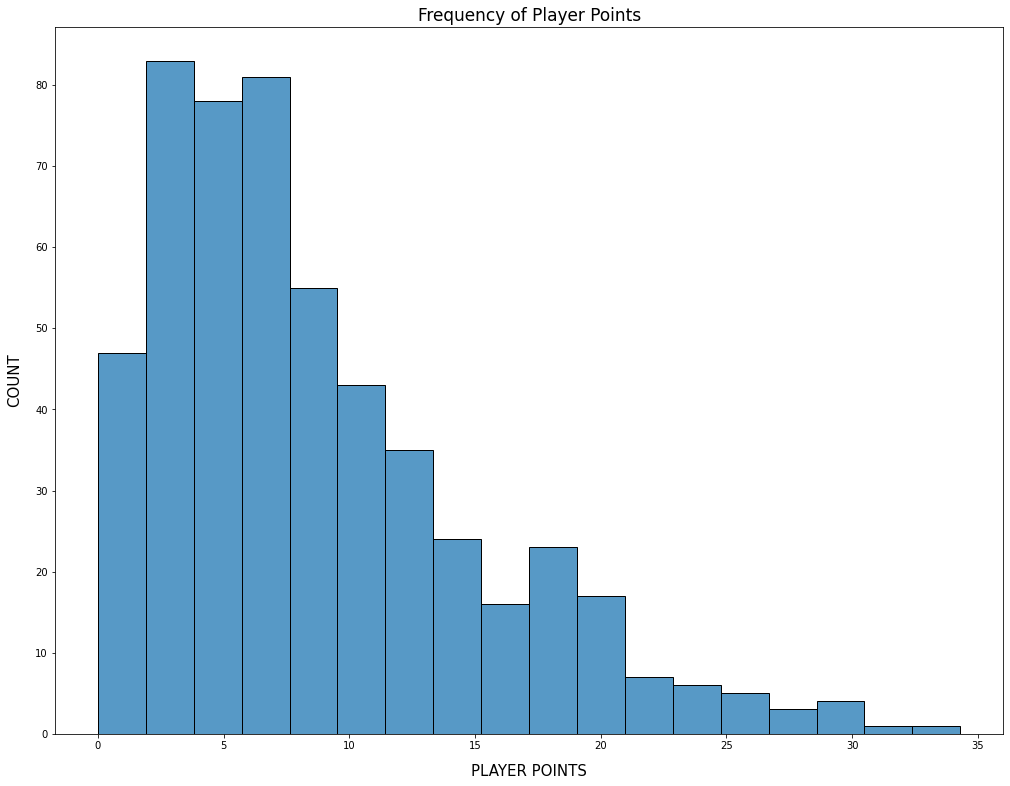

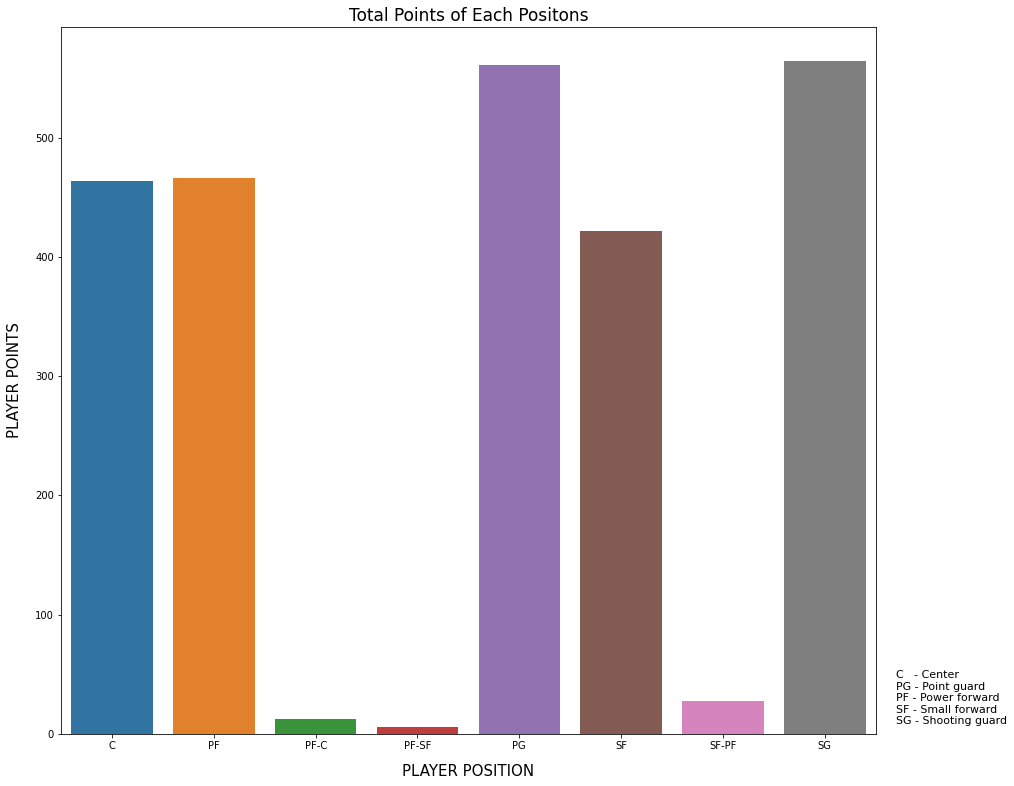

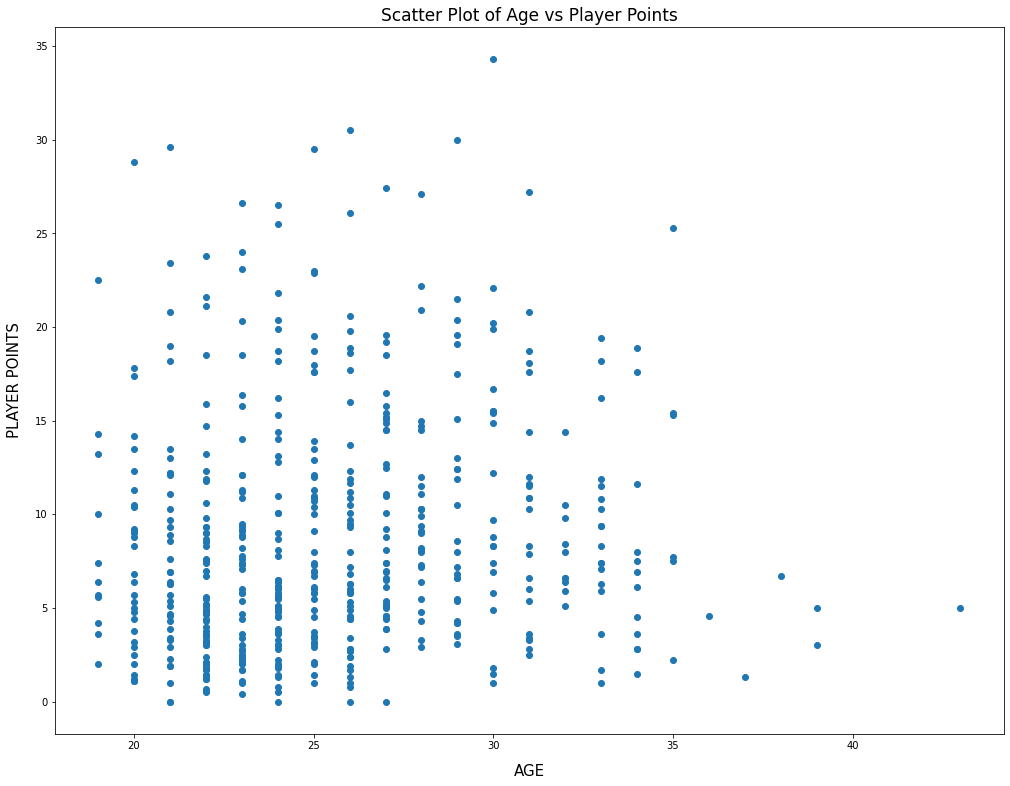

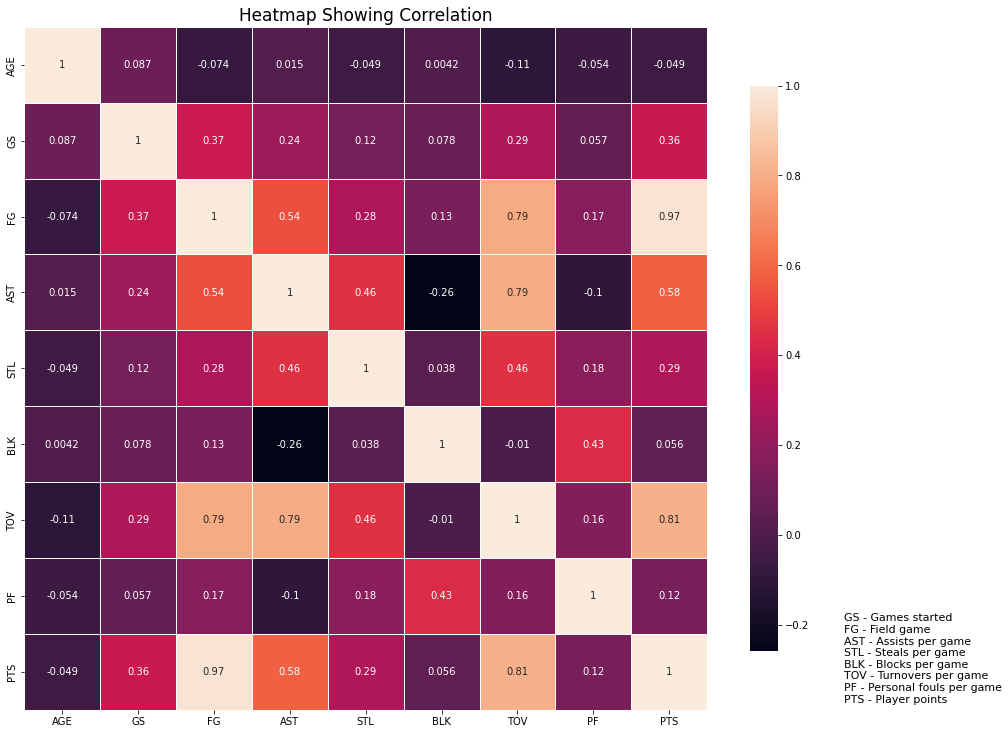

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
df20 = pd.read_html(url, header=0)
df = df20[0]
df4 = df20[0]
df = df.loc[:, ['Player','Rk', 'Pos', 'Age', 'G','GS', 'PTS']]
df = df.drop(df[df.Age == 'Age'].index, axis='rows')
df['PTS'] = df['PTS'].astype(np.float64)
df['Age'] = df['Age'].astype(np.int64)
df['GS'] = df['GS'].astype(np.int64)
df.drop_duplicates(subset=['Player'], inplace = True , ignore_index=True)
df = df.sort_values(by=['Age'], ascending=True)
df = df.reset_index(drop=True)
    
df2 = df[['Pos', 'Age' , 'GS' , 'PTS']].copy()
df2 = df2.drop(df2[df2.GS<25].index)
df2 = df2.reset_index(drop=True)

df3 = df2[['Pos' , 'PTS']].copy()

cols = ['Age','GS', 'FG' , 'AST' , 'STL' , 'BLK' , 'TOV', 'PF', 'PTS']
df4[cols] = df4[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df4 = df4.drop(df4[df4.Pos == 'Pos'].index, axis='rows')
df4 = df4.drop(df4[df4.GS<25].index)
df4 = df4.sort_values(by=['Age'], ascending=True)
df4.rename(columns = {'Age':'AGE'}, inplace = True)
df4 = df4.reset_index(drop=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


fig1 = plt.figure(figsize=(17,13))
yng = len(df[(df['Age']<=20)])
mid = len(df[(df['Age']>20) & (df['Age']<=30)])
old = len(df[(df['Age']>30)])
pge = pd.Series(data=[yng, mid, old])
plt.text(-1.3,-1,'Min.Age-19\nMax.Age-43',fontsize=11.6)
plt.title("NBA Player Age Data 2019-20 Season", fontsize=17)
pge.plot.pie(labels =['AGE<21','20< AGE <31','AGE>30'],fontsize=12, autopct='%1.1f%%' ,figsize=(14,11),label="")


fig2 = plt.figure(figsize=(17,13))
plt.title("Frequency of Player Points", fontsize = 17)
plt.xlabel("PLAYER POINTS",fontsize=15,labelpad=13)
plt.ylabel("COUNT",fontsize=15,labelpad=13)
sns.histplot(df.PTS,kde=False)


fig3 = plt.figure(figsize=(14.6,13))
df3=df3.groupby(['Pos']).sum()
plt.text(7.7,8,'C   - Center\nPG - Point guard\nPF - Power forward\nSF - Small forward\nSG - Shooting guard',fontsize=11)
sns.barplot( x=df3.index ,y='PTS', data=df3)
plt.title("Total Points of Each Positons", fontsize = 17)
plt.xlabel("PLAYER POSITION", fontsize = 15, labelpad=13)
plt.ylabel("PLAYER POINTS", fontsize = 15, labelpad=13)

  
fig4 = plt.figure(figsize=(17,13))
plt.title("Scatter Plot of Age vs Player Points",fontsize=17)
plt.xlabel("AGE", fontsize = 15, labelpad=13)
plt.ylabel("PLAYER POINTS", fontsize = 15, labelpad=13)
plt.scatter(df.Age, df.PTS)


fig5 = plt.figure(figsize=(15.3,13))
sns.heatmap(df4.corr(), annot = True, square = True , linewidths = 1,cbar_kws = {'shrink':0.8})
plt.title("Heatmap Showing Correlation",fontsize=17)
plt.text(10.8,8.9,'GS - Games started\nFG - Field game\nAST - Assists per game\nSTL - Steals per game\nBLK - Blocks per game\nTOV - Turnovers per game\nPF - Personal fouls per game\nPTS - Player points', fontsize=11)


pdf = PdfPages("output.pdf")
for fig in range(1, 6):
    pdf.savefig( fig , dpi=40, pad_inches=1.2, bbox_inches='tight' )
pdf.close()

